Load and plot distribution


In [7]:
# imports
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

import constants
from utils.trial_data import TrialData
from utils.util_plot import (
    eval_trial_data,
    plot_time_frechet,
    plot_distance_angle,
    plot_rms,
    scatter_time_frechet, scatter_distance_angle, scatter_rms,
    eval_grid)

import scienceplots

In [8]:
# DEFINE GLOBAL VARIABLES
WORK_DIR = '/home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results'

DOCS_PATH = '/home/turtlewizard/repos/thesis-mppi-model-ident/msc-docs'
SAVE_PATH = os.path.join(DOCS_PATH, 'plots')
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# first 4 ok, use from [1] for scatter plots
colors = [
    "#1e5167", "#6ab6c7", "#95265c", "#5ab220", "#c86be1",
    "#20f53d", "#e028e5", "#c9dd87", "#4224bf", "#10eddc"]

DPI = 300

# https://github.com/garrettj403/SciencePlots/blob/master/examples/plot-examples.py
CONTEXT_SCIENCE = plt.style.context(['science'])
CONTEXT_SCIENCE_GRID = plt.style.context(['science', 'grid'])
CONTEXT_SCATTER = plt.style.context(['science', 'scatter'])

In [9]:
# __________ DISTRIBUTION TRIALS __________
waffle_std_path = WORK_DIR + '/default_distribution_2024-11-24_13-23-28'
burger_std_path = WORK_DIR + '/burger_distribution_2024-11-24_14-35-54'
enjoy_std_path = WORK_DIR + '/enjoy_distribution_2024-11-24_14-35-12'
enjoy2_std_path = WORK_DIR + '/enjoy_distribution_w_enjoy_params_2024-12-27_21-09-52'

waffle_std_data = eval_trial_data(waffle_std_path)
burger_std_data = eval_trial_data(burger_std_path)
enjoy_std_data = eval_trial_data(enjoy_std_path)
enjoy2_std_data = eval_trial_data(enjoy2_std_path)

trial_datas_std = {
    'waffle': waffle_std_data,
    'burger': burger_std_data,
    'enjoy': enjoy_std_data,
    'enjoy2': enjoy2_std_data,
}
# KÉSZ

___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/default_distribution_2024-11-24_13-23-28 ___
RUN NAME: default_distribution
Runs/successful: 100/99
Whole run time: 58.66 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/burger_distribution_2024-11-24_14-35-54 ___
RUN NAME: burger_distribution
Runs/successful: 100/98
Whole run time: 57.57 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_distribution_2024-11-24_14-35-12 ___
RUN NAME: enjoy_distribution
Runs/successful: 100/100
Whole run time: 59.54 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_distribution_w_enjoy_params_2024-12-27_21-09-52 ___
RUN NAME: enjoy_distribution_w_enjoy_params
Runs/successful: 100/94
Whole run time: 132.10 [mins]


In [10]:
# __________ RANDOM TRIALS __________
waffle_rand100_path = WORK_DIR + '/waffle_random_2024-12-28_12-42-49'
waffle_rand500_path = WORK_DIR + '/waffle_random_2024-12-28_15-49-04'

waffle_rand100_data = eval_trial_data(waffle_rand100_path)
waffle_rand500_data = eval_trial_data(waffle_rand500_path)

trial_datas_rand = {
    'waffle_random_500': waffle_rand500_data,
    'waffle_random_100': waffle_rand100_data,
    'waffle_default': waffle_std_data,
}

enjoy_rand100_path = WORK_DIR + '/enjoy_random_small_2024-12-28_23-55-11'
enjoy_rand500_path = WORK_DIR + '/enjoy_random_2024-12-28_23-55-20'

enjoy_rand100_data = eval_trial_data(enjoy_rand100_path)
enjoy_rand500_data = eval_trial_data(enjoy_rand500_path)
# KÉSZ

___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_random_2024-12-28_12-42-49 ___
RUN NAME: waffle_random
Runs/successful: 100/81
Whole run time: 50.48 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_random_2024-12-28_15-49-04 ___
RUN NAME: waffle_random
Runs/successful: 500/399
Whole run time: 253.18 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_random_small_2024-12-28_23-55-11 ___
RUN NAME: enjoy_random_small
Runs/successful: 100/87
Whole run time: 51.87 [mins]
___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/enjoy_random_2024-12-28_23-55-20 ___
RUN NAME: enjoy_random
Runs/successful: 500/412
Whole run time: 259.36 [mins]


In [11]:
# __________ GRID TRIALS __________
waffle_grid_path = WORK_DIR + '/waffle_grid_2024-12-28_12-42-57'
waffle_grid_data = eval_trial_data(waffle_grid_path)
# KÉSZ

___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_grid_2024-12-28_12-42-57 ___
RUN NAME: waffle_grid
Runs/successful: 808/688
Whole run time: 477.24 [mins]


In [13]:
import pandas as pd

# __________ BAYESIAN __________
waffle_bayesian100_path = WORK_DIR + '/waffle_bayesian_2024-12-28_15-47-40'
waffle_bayesian500_path = WORK_DIR + '/waffle_bayesian_big_2024-12-29_00-12-41'
# enjoy_bayesian100_path = WORK_DIR + ''
enjoy_bayesian500_path = WORK_DIR + '/enjoy_bayesian_big_2024-12-29_00-13-34'

# enjoy_bayesian100_data = pd.read_csv(os.path.join(enjoy_bayesian100_path, 'final_results.csv'))
enjoy_bayesian500_data = pd.read_csv(os.path.join(enjoy_bayesian500_path, 'final_results.csv'))
waffle_bayesian100_data = pd.read_csv(os.path.join(waffle_bayesian100_path, 'final_results.csv'))
waffle_bayesian500_data = pd.read_csv(os.path.join(waffle_bayesian500_path, 'final_results.csv'))

datas_bayes = {
    'waffle_bayesian500': waffle_bayesian500_data,
    'enjoy_bayesian500': enjoy_bayesian500_data,
    'waffle_bayesian100': waffle_bayesian100_data,
    # 'enjoy_bayesian100': enjoy_bayesian100_data,
}
# KÉSZ

+---------+----------------+------------------------+--------------------+
| Label   | Run Time [s]   | Frechet Distance [m]   | Average Cost [-]   |
+=========+================+========================+====================+
| waffle  | 33.76 ± 0.858  | 0.22 ± 0.027           | 11.01 ± 0.109      |
+---------+----------------+------------------------+--------------------+
| burger  | 33.48 ± 0.838  | 0.22 ± 0.016           | 11.01 ± 0.117      |
+---------+----------------+------------------------+--------------------+
| enjoy   | 34.94 ± 0.928  | 0.20 ± 0.018           | 10.85 ± 0.154      |
+---------+----------------+------------------------+--------------------+
| enjoy2  | 77.65 ± 0.931  | 0.13 ± 0.008           | 13.37 ± 0.042      |
+---------+----------------+------------------------+--------------------+
+---------+------------------------+-----------------------+
| Label   | Distance to Goal [m]   | Angle to Goal [rad]   |
+=========+========================+=================

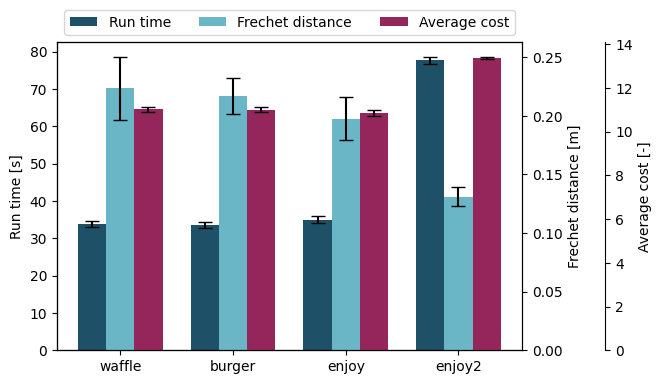

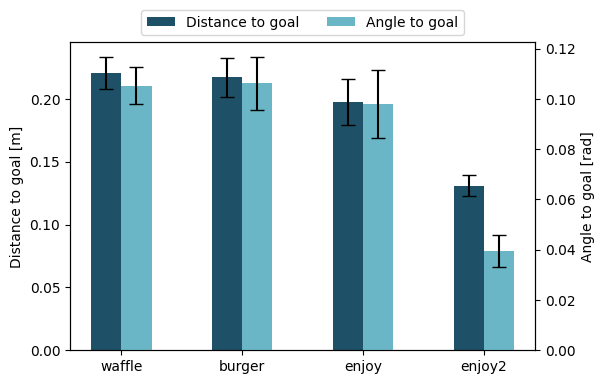

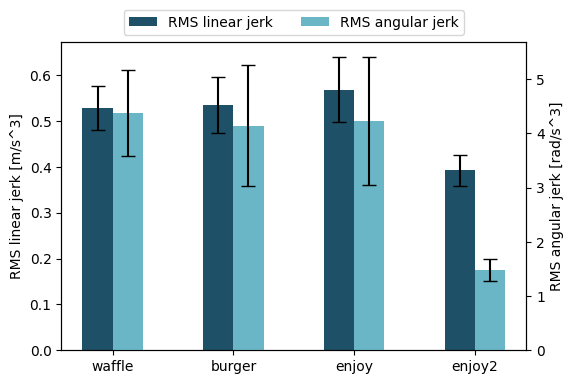

In [20]:
fig = plot_time_frechet(trial_datas_std)

fig2 = plot_distance_angle(trial_datas_std)

fig3 = plot_rms(trial_datas_std)
plt.show()

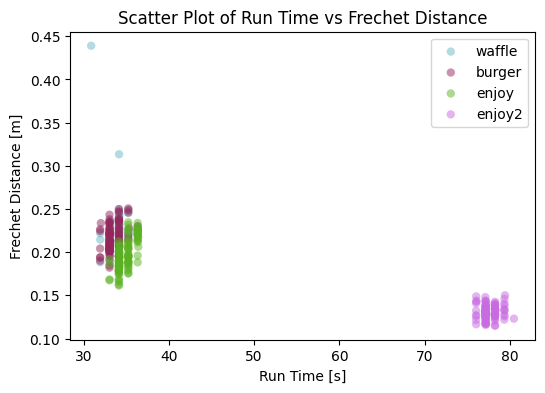

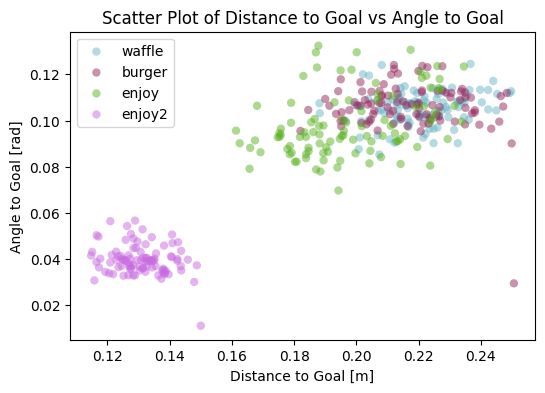

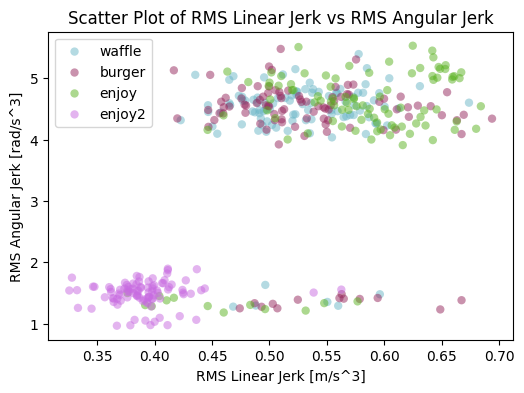

In [21]:
# plot the scatter of different robot types
fig = scatter_time_frechet(trial_datas_std)
fig2 = scatter_distance_angle(trial_datas_std)
fig3 = scatter_rms(trial_datas_std)

plt.show()

+-------------------+----------------+------------------------+--------------------+
| Label             | Run Time [s]   | Frechet Distance [m]   | Average Cost [-]   |
+===================+================+========================+====================+
| waffle_random_500 | 27.72 ± 3.622  | 0.22 ± 0.063           | 11.31 ± 0.520      |
+-------------------+----------------+------------------------+--------------------+
| waffle_random_100 | 27.47 ± 2.908  | 0.20 ± 0.054           | 11.33 ± 0.506      |
+-------------------+----------------+------------------------+--------------------+
| waffle_default    | 33.76 ± 0.858  | 0.22 ± 0.027           | 11.01 ± 0.109      |
+-------------------+----------------+------------------------+--------------------+
+-------------------+------------------------+-----------------------+
| Label             | Distance to Goal [m]   | Angle to Goal [rad]   |
+===================+========================+=======================+
| waffle_random_500 | 

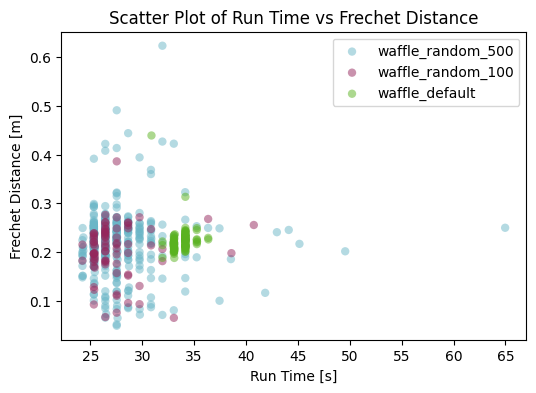

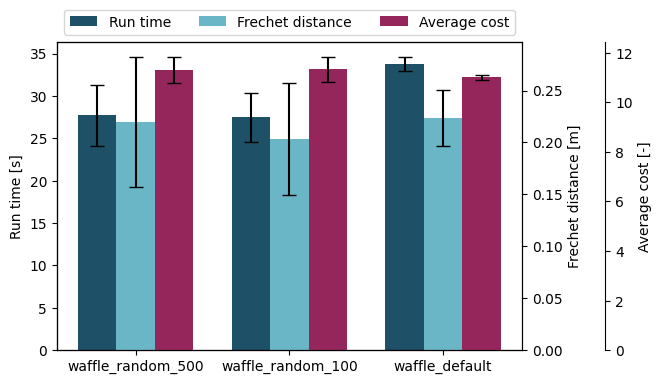

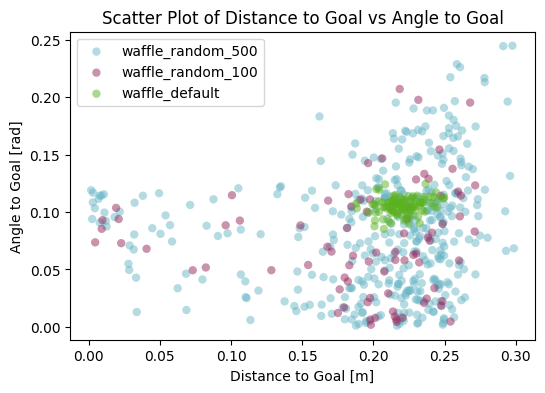

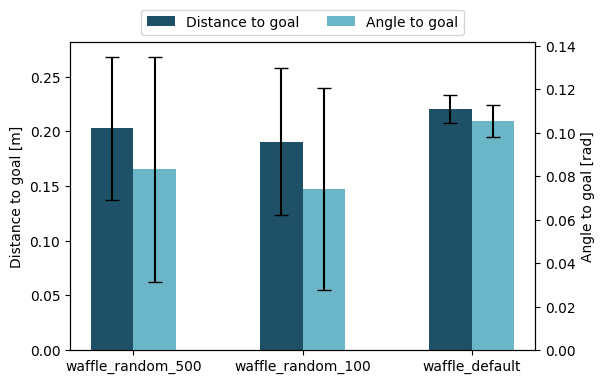

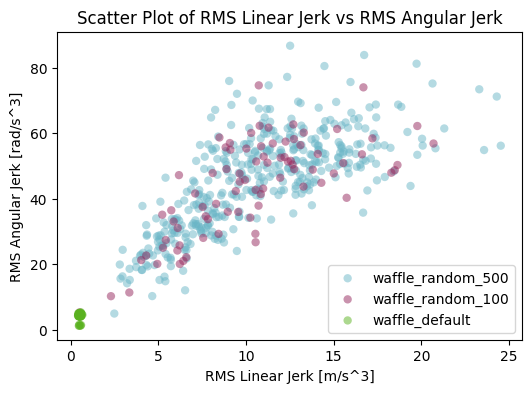

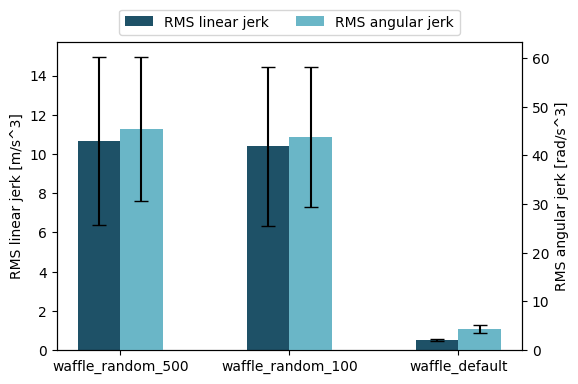

In [ ]:
# create a scatter plot
fig = scatter_time_frechet(trial_datas_rand)
fig2 = plot_time_frechet(trial_datas_rand)

fig3 = scatter_distance_angle(trial_datas_rand)
fig4 = plot_distance_angle(trial_datas_rand)

fig5 = scatter_rms(trial_datas_rand)
fig6 = plot_rms(trial_datas_rand)
plt.show()

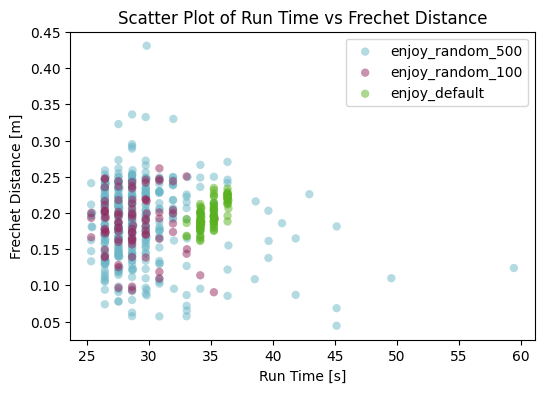

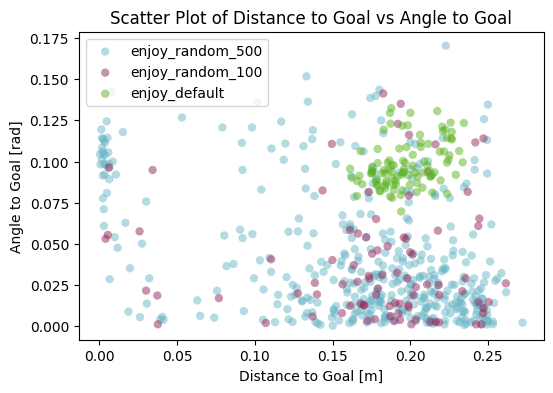

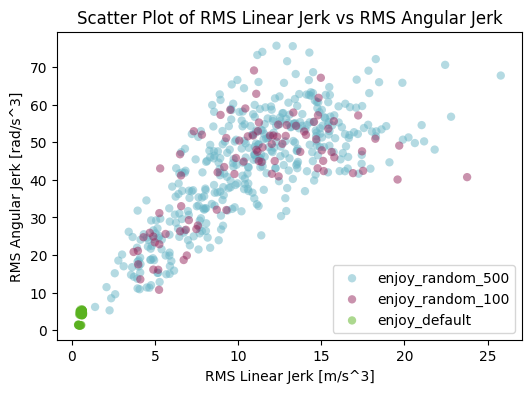

In [23]:
# plot the random result of enjoy
trial_datas_rand_enjoy = {
    'enjoy_random_500': enjoy_rand500_data,
    'enjoy_random_100': enjoy_rand100_data,
    'enjoy_default': enjoy_std_data,
}

fig = scatter_time_frechet(trial_datas_rand_enjoy)
# fig2 = plot_time_frechet(trial_datas_rand_enjoy)
fig3 = scatter_distance_angle(trial_datas_rand_enjoy)
# fig4 = plot_distance_angle(trial_datas_rand_enjoy)
fig5 = scatter_rms(trial_datas_rand_enjoy)
# fig6 = plot_rms(trial_datas_rand_enjoy)

___ Processing /home/turtlewizard/repos/thesis-mppi-model-ident/optimization_results/waffle_grid_2024-12-28_12-42-57 ___
RUN NAME: waffle_grid
Runs/successful: 808/688
Whole run time: 477.24 [mins]
Plotting time_elapsed
Plotting score
Plotting distance_to_goal
Plotting angle_to_goal
Plotting avg_cost
Plotting rms_linear_jerk
Plotting rms_angular_jerk


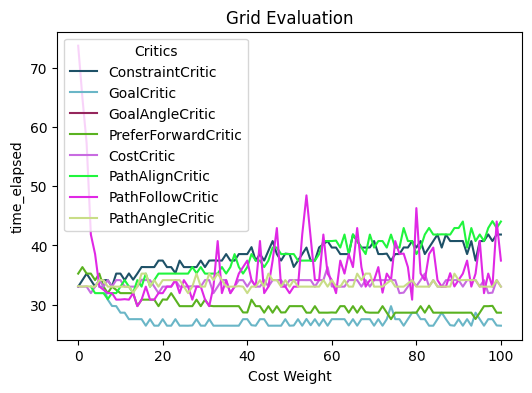

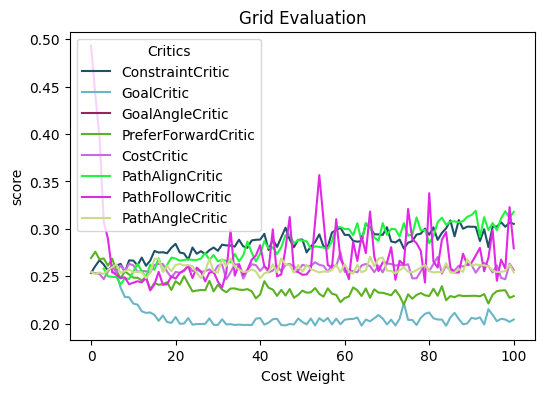

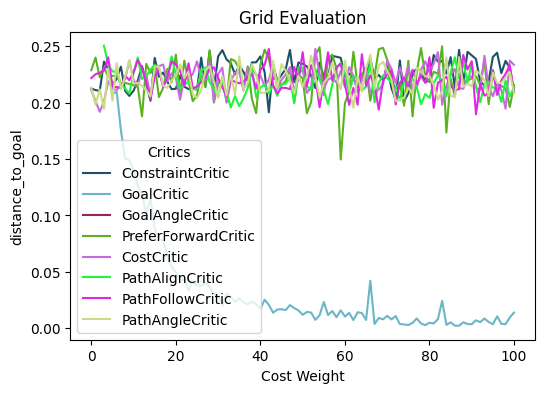

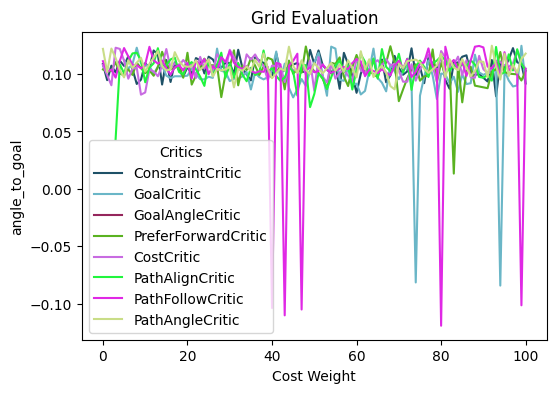

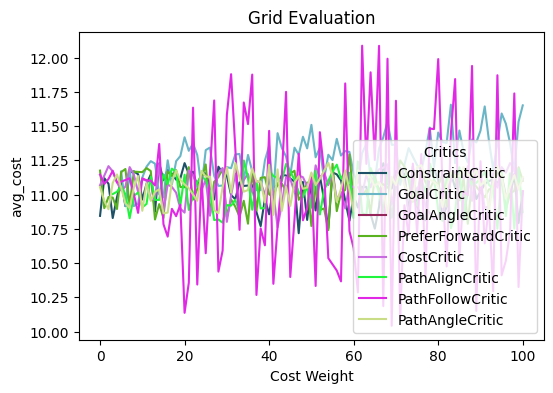

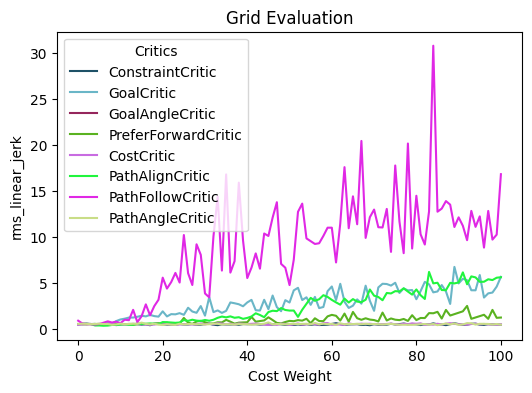

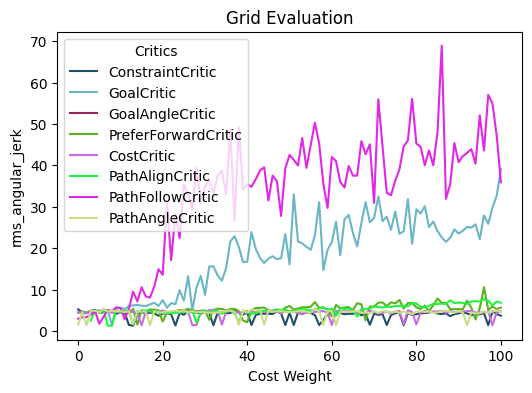

In [24]:
# no GoalAngleCritic
figures = eval_grid(
    waffle_grid_path, constants.DEFAULT_MPPI_CRITIC_NAMES, colors=colors)
plt.show()

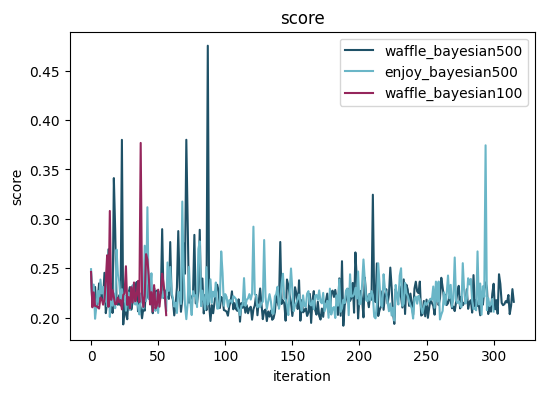

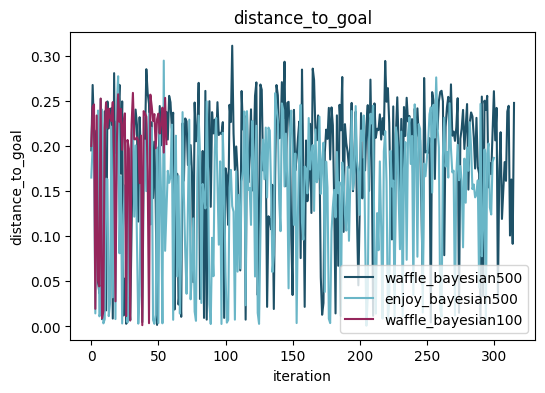

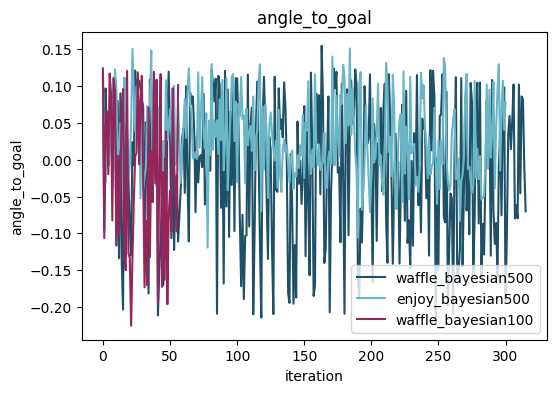

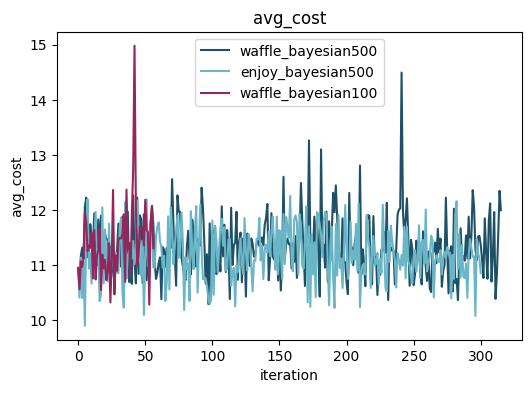

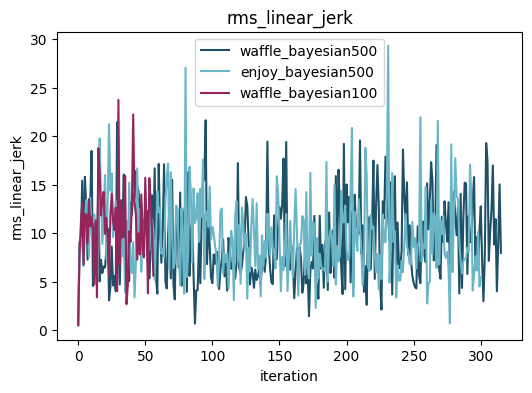

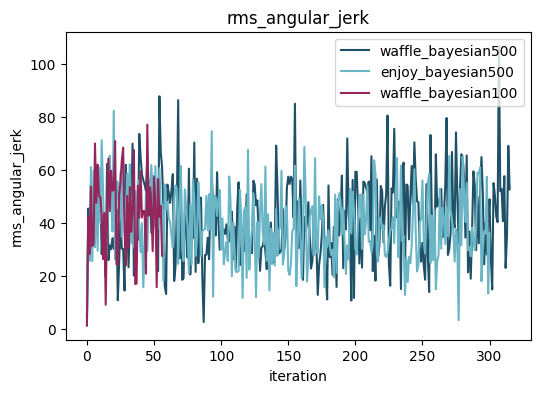

In [15]:
# eval bayesian optimization
# use trial_datas_bayesian
FIGSIZE = (6, 4)
default_colors = colors


def plot_bayes(trial_datas: dict[str, TrialData], colors=default_colors) -> plt.Figure:
    stuff_to_plot = [
        'score',
        'distance_to_goal',
        'angle_to_goal',
        'avg_cost',
        'rms_linear_jerk',
        'rms_angular_jerk',
    ]

    figures = []
    for metric in stuff_to_plot:
        fig, ax = plt.subplots(num=f'Bayesian optimization: {metric}', figsize=FIGSIZE)

        for i, (name, data) in enumerate(trial_datas.items()):
            id_ints = np.arange(len(data['id']))
            ax.plot(id_ints, data[metric], label=name, color=colors[i])

        ax.set_title(metric)
        ax.set_xlabel('iteration')
        ax.set_ylabel(metric)
        ax.legend()

        figures.append(fig)

    return figures


figures = plot_bayes(datas_bayes)
plt.show()

/tmp/ipykernel_43861/2434121282.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  critics_df.rename(columns=renamed_columns, inplace=True)


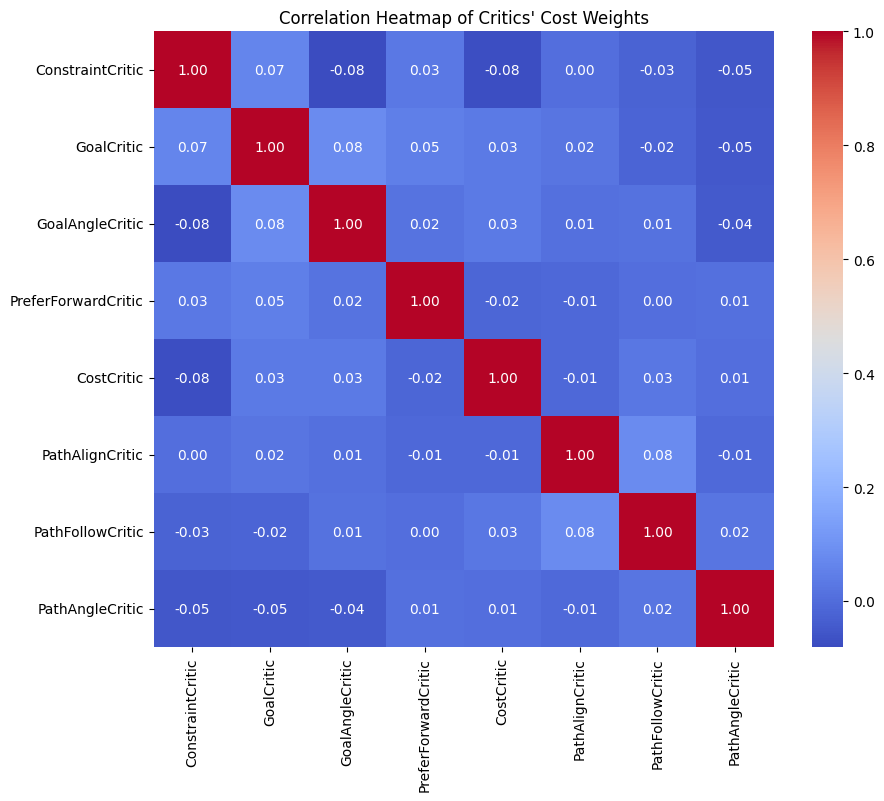

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "path_to_your_file.csv"  # Replace with your file path
file_path = '/home/turtlewizard/repos/thesis-mppi-model-ident/evaluation/02_random/waffle_random/final_results.csv'
data = pd.read_csv(file_path)

# Extract cost_weight columns
cost_weight_columns = [col for col in data.columns if "cost_weight" in col]
critics_df = data[cost_weight_columns]

# Rename columns to remove '.cost_weight'
renamed_columns = {col: col.replace(".cost_weight", "") for col in cost_weight_columns}
critics_df.rename(columns=renamed_columns, inplace=True)

# Calculate correlations
correlation_matrix = critics_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Add titles and labels
plt.title("Correlation Heatmap of Critics' Cost Weights")
plt.show()